# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [9]:
def apply_svd_custom(X_train, X_test, n_components):
    # Center the data
    mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - mean
    X_test_centered = X_test - mean  # Use training mean to center test data

    # Compute A^T A
    ATA = np.dot(X_train_centered.T, X_train_centered)

    # Compute eigenvalues and eigenvectors of A^T A
    eigvals, eigvecs = np.linalg.eigh(ATA)

    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
    # Clip negative eigenvalues to zero
    eigvals_clipped = np.clip(eigvals, a_min=0, a_max=None)

    # Compute singular values (sigma_i = sqrt(eigenvalues))
    singular_values = np.sqrt(eigvals_clipped)

    # Select top n_components singular values and corresponding vectors
    singular_values = singular_values[:n_components]
    V = eigvecs[:, :n_components]

    # Project the data onto the top n_components right singular vectors
    X_train_svd = np.dot(X_train_centered, V)
    X_test_svd = np.dot(X_test_centered, V)

    return X_train_svd, X_test_svd, V, singular_values

## Part 3: Train Logistic Regression and Measure Performance

In [10]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [11]:
svd_components = [50, 100, 200, 300, 400, 500, 784]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, V, singular_values = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")
    
    # Store the results
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time,
        'V': V,  # Store V for visualization
        'singular_values': singular_values
    })


Training models with different levels of SVD preprocessing...
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 5.1345 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 17.3075 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 39.7804 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.9206, Training time: 70.2986 seconds
Applying custom SVD with 400 components...
SVD components: 400, Accuracy: 0.9196, Training time: 122.1324 seconds
Applying custom SVD with 500 components...
SVD components: 500, Accuracy: 0.9205, Training time: 153.2339 seconds
Applying custom SVD with 784 components...
SVD components: 784, Accuracy: 0.9207, Training time: 282.7174 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


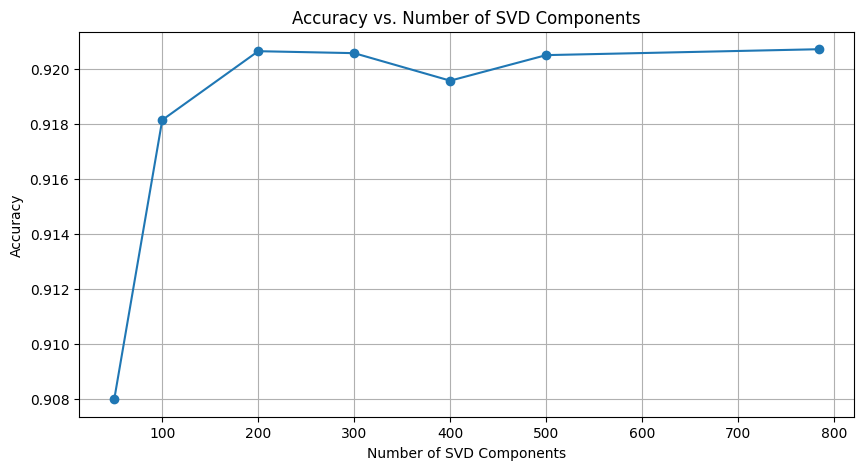

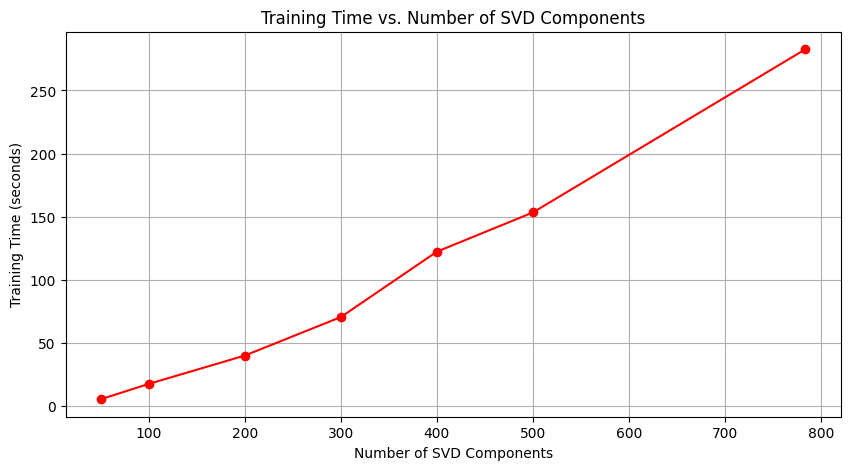

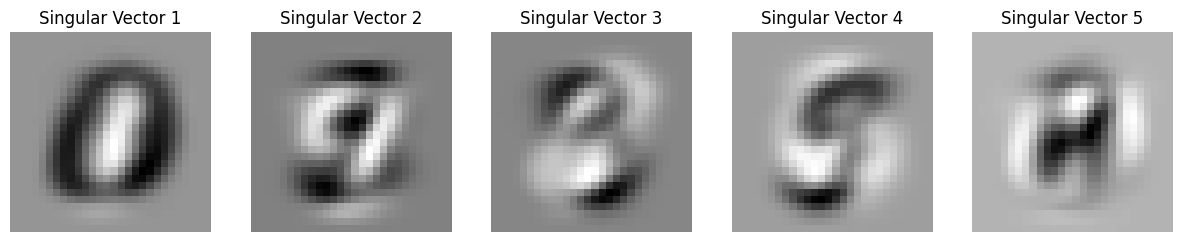

In [12]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# Extract results for plotting
n_components_list = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

# Plot accuracy vs. number of SVD components
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot training time vs. number of SVD components
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, training_times, marker='o', color='red')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.show()

# Visualize the top 5 singular vectors (from the run with maximum components)
max_components_result = results[-1]  # Assuming the last one has the maximum components
V_max = max_components_result['V']

# Reshape and plot the top 5 singular vectors
top_5_vectors = V_max[:, :5]  # Get first 5 singular vectors
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    singular_vector = top_5_vectors[:, i]
    image = singular_vector.reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Singular Vector {i+1}')
    axes[i].axis('off')
plt.show()

## Part 6: Analyze / Conclusion 

YOUR ANSWER: The best number of SVD components used should be around 200 to 300 components. As we can see from the graphs, as the number of components increases so does the accuracy but faces diminishing returns as the number of components get higher, hitting a limit of slightly over 92% accuracy. However, the training time of the dataset increases proportionately and linearly with the number of components, so the algorithm would become less and less efficient as the number of components increase. Thus, taking both the accuracy and training time into consideration, it would seem that around 200-300 components is the best in terms of balancing the two factors. 